# 모듈 임포트

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# 회귀

In [2]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.5)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

def sse(resid):
    return sum(resid**2)

resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
print("sse_train: ", sse_train)

resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print("sse_test: ", sse_test)

sse_train:  1.7802760473538124e-24
sse_test:  568010.4778700303


In [3]:
print("train model score: ", model.score(X_train, y_train))
print("test model score: ", model.score(X_test, y_test))

train model score:  1.0
test model score:  0.34544778200857873


In [4]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    
    fig.tight_layout()
    return fig, axes

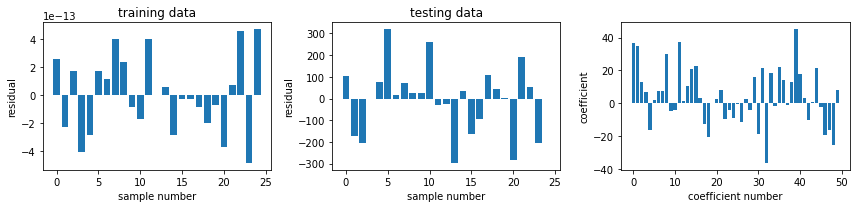

In [5]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [6]:
model = linear_model.Ridge(alpha=2.5)
model.fit(X_train, y_train)

resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
print("sse_train: ", sse_train)

resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print("sse_test: ", sse_test)

sse_train:  2338.793499249911
sse_test:  570190.8248906793


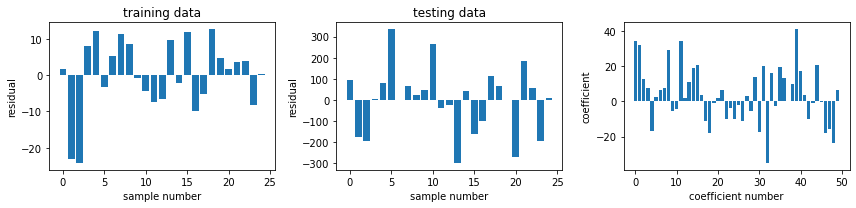

In [7]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

sse_train:  461.6283346132342
sse_test:  10294.539578193213


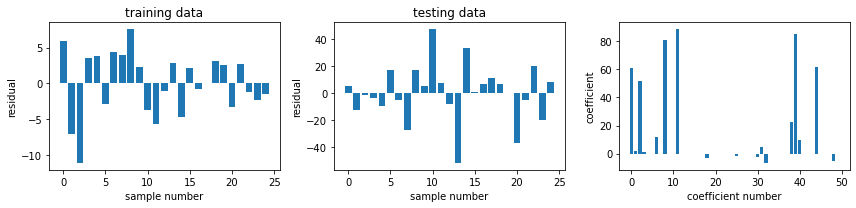

In [8]:
model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)

resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
print("sse_train: ", sse_train)

resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print("sse_test: ", sse_test)

fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [9]:
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)


for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    sse_train[n] = sse(y_train - model.predict(X_train))
    sse_test[n] = sse(y_test - model.predict(X_test))

C:\Users\dcd\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96.35086281085617, tolerance: 86.0450555816941
  positive)
C:\Users\dcd\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107.00177522819597, tolerance: 86.0450555816941
  positive)
C:\Users\dcd\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.03085727951874, tolerance: 86.0450555816941
  positive)
C:\Users\dcd\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the 

Text(0, 0.5, 'sse')

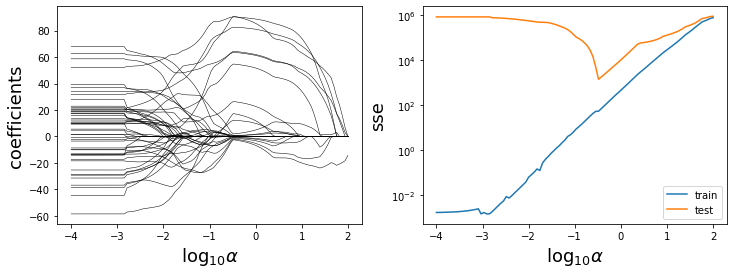

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)

In [11]:
model = linear_model.LassoCV()
model.fit(X_all, y_all)

model.alpha_

0.0924501654051121

sse_train:  2.0441799820759003
sse_test:  2.5536070599355383


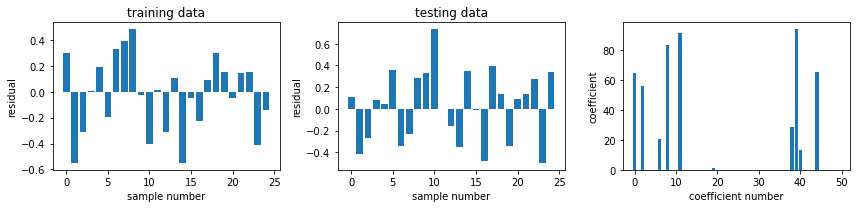

In [12]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
print("sse_train: ", sse_train)

resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print("sse_test: ", sse_test)

fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

model.alpha_:  0.25751585738713817
model.l1_ratio:  0.5

sse_train:  3920.0164570559573
sse_test:  568414.0995711503


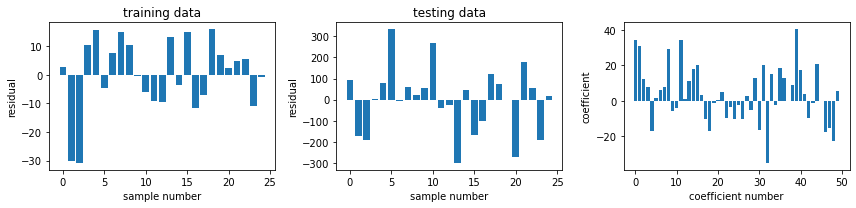

In [13]:
model = linear_model.ElasticNetCV()
model.fit(X_train, y_train)

print("model.alpha_: ", model.alpha_)
print("model.l1_ratio: ", model.l1_ratio)
print()

resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
print("sse_train: ", sse_train)

resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print("sse_test: ", sse_test)

fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

# 분류

In [14]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [15]:
print("Iris target name: ", iris.target_names)
print("Iris feature name: ", iris.feature_names)
print()

print("Iris data shape: ", iris.data.shape)
print("Iris target shape: ", iris.target.shape)

X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7)
classifier = linear_model.LogisticRegression()
classifier.fit(X_train, y_train)

Iris target name:  ['setosa' 'versicolor' 'virginica']
Iris feature name:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Iris data shape:  (150, 4)
Iris target shape:  (150,)


LogisticRegression()

In [16]:
y_test_pred = classifier.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.91      0.95        11
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [17]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[19,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 15]], dtype=int64)

In [18]:
np.bincount(y_test)

array([19, 11, 15], dtype=int64)

In [19]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[19,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 14]], dtype=int64)

In [20]:
train_size_vec = np.linspace(0.1, 0.9, 30)

classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier]

cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)


for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_p = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_p).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

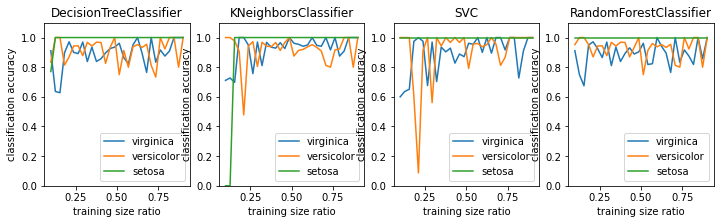

In [21]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers):
    
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

# 클러스터링

In [26]:
X, y = iris.data, iris.target

n_clusters = 3
clustering = cluster.KMeans(n_clusters=n_clusters)

clustering.fit(X)

y_pred = clustering.predict(X)
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [23]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [27]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [28]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

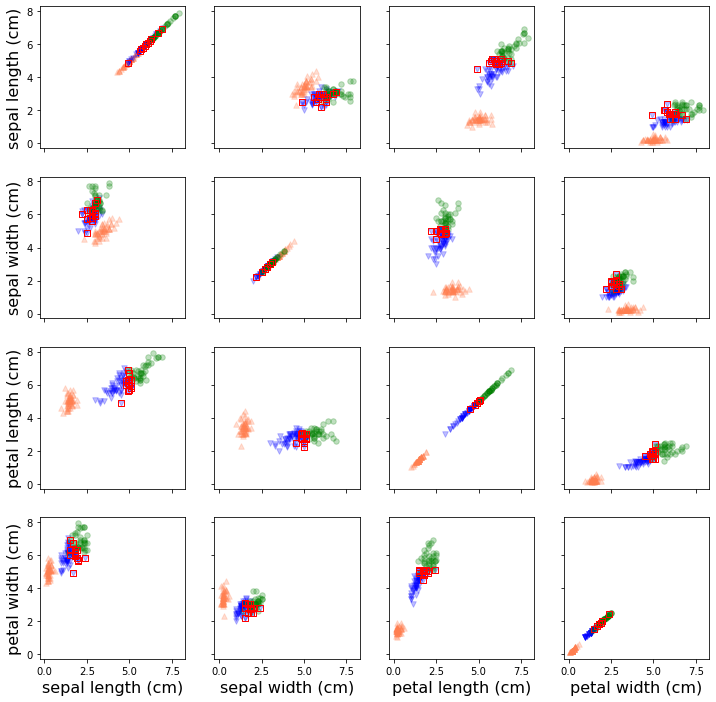

In [29]:
N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]

for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask], s=30, marker=markers[p], color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n], s=30, marker="s", edgecolor="red", facecolor=(1,1,1,0))
            
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)